# Mecánica de Medios Continuos
## Por Jorge I. Zuluaga
### Cuadernos de exploración numérica
### **Medios Autogravitantes: Planetas**

## Planetas y Estrellas

Modelo Tierra: https://pypi.org/project/rockhound/ 

In [1]:
!python -m pip install rockhound

     |████████████████████████████████| 19.3 MB 1.1 MB/s 


In [ ]:
import rockhound as rh
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
prem=rh.fetch_prem()

In [ ]:
!wget -O /root/.cache/rockhound/PREM_1s.csv https://ds.iris.edu/files/products/emc/data/PREM/PREM_1s.csv

--2021-12-07 18:43:45--  https://ds.iris.edu/files/products/emc/data/PREM/PREM_1s.csv
Resolving ds.iris.edu (ds.iris.edu)... 128.95.166.129
Connecting to ds.iris.edu (ds.iris.edu)|128.95.166.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14304 (14K) [text/csv]
Saving to: ‘/root/.cache/rockhound/PREM_1s.csv’

/root/.cache/rockho 100%[===================>]  13.97K  --.-KB/s    in 0s      

2021-12-07 18:43:45 (68.5 MB/s) - ‘/root/.cache/rockhound/PREM_1s.csv’ saved [14304/14304]



In [ ]:
prem

,radius,depth,density,Vpv,Vph,Vsv,Vsh,eta,Q_mu,Q_kappa
0,6371.0,0.0,1.02000,1.45000,1.45000,0.00000,0.00000,1.0,0.0,57823.0
1,6370.0,1.0,1.02000,1.45000,1.45000,0.00000,0.00000,1.0,0.0,57823.0
2,6369.0,2.0,1.02000,1.45000,1.45000,0.00000,0.00000,1.0,0.0,57823.0
3,6368.0,3.0,1.02000,1.45000,1.45000,0.00000,0.00000,1.0,0.0,57823.0
4,6368.0,3.0,2.60000,5.80000,5.80000,3.20000,3.20000,1.0,600.0,57823.0
...,...,...,...,...,...,...,...,...,...,...
194,400.0,5971.0,13.05366,11.23711,11.23711,3.65027,3.65027,1.0,84.6,1327.7
195,300.0,6071.0,13.06890,11.24809,11.24809,3.65794,3.65794,1.0,84.6,1327.7
196,200.0,6171.0,13.07979,11.25593,11.25593,3.66342,3.66342,1.0,84.6,1327.7
197,100.0,6271.0,13.08632,11.26063,11.26063,3.66670,3.66670,1.0,84.6,1327.7


Text(0, 0.5, '$v_S$ [m/s]')

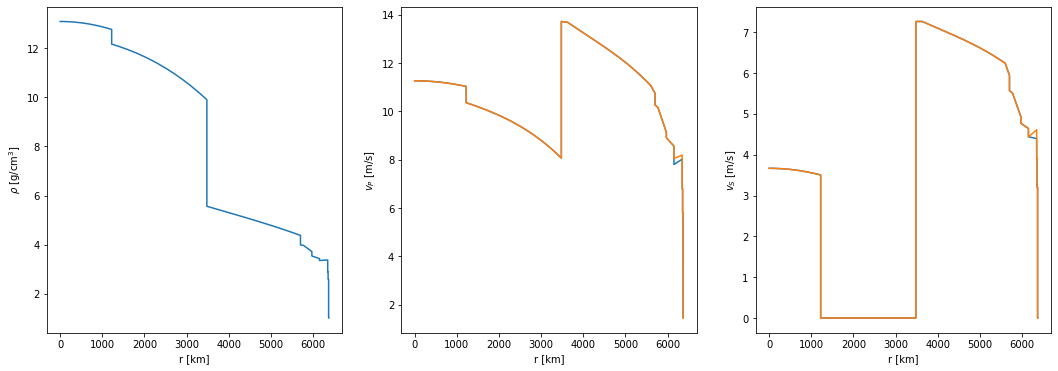

In [ ]:
fig,axs=plt.subplots(1,3,figsize=(18,6))
ax=axs[0]
ax.plot(prem.radius,prem.density)
ax.set_xlabel("r [km]")
ax.set_ylabel(r"$\rho$ [g/cm$^3$]")
ax=axs[1]
ax.plot(prem.radius,prem.Vpv)
ax.plot(prem.radius,prem.Vph)
ax.set_xlabel("r [km]")
ax.set_ylabel(r"$v_P$ [m/s]")
ax=axs[2]
ax.plot(prem.radius,prem.Vsv)
ax.plot(prem.radius,prem.Vsh)
ax.set_xlabel("r [km]")
ax.set_ylabel(r"$v_S$ [m/s]")

In [ ]:
prem.columns

Index(['radius', 'depth', 'density', 'Vpv', 'Vph', 'Vsv', 'Vsh', 'eta', 'Q_mu',
       'Q_kappa'],
      dtype='object')

Velocidad de las ondas sísmicas (ver https://www.ucl.ac.uk/EarthSci/people/lidunka/GEOL2014/Revised%20Course/Detailed%20Lecture%20Notes/LECTURE4.PDF):

$$
v_P = \sqrt{\frac{K+4\mu/3}{\rho}}
$$

$$
v_S = \sqrt{\frac{\mu}{\rho}}
$$

$$
K=\rho(v_P^2-4 v_S^2/3)
$$

$$
\beta\equiv\frac{K}{\rho}=v_P^2-4 v_S^2/3
$$

$$
\frac{dP}{d\rho}=\beta(r)=v_P^2-4 v_S^2/3
$$



$\mu$ is the shear-modulus.

In [ ]:
mu=prem.Vsh**2*prem.density
K=prem.density*(prem.Vph**2-4*prem.Vsh**2/3)*1e9

Text(0.5, 0, 'r [km]')

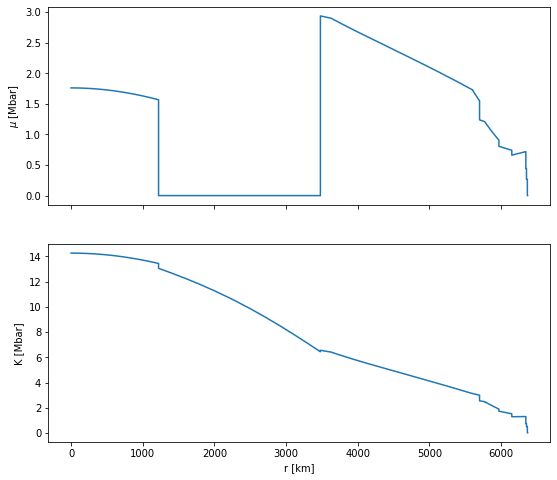

In [ ]:
fig,axs=plt.subplots(2,1,figsize=(9,8),sharex=True)
ax=axs[0]
ax.plot(prem.radius,mu*1e9/1e5/1e6)
ax.set_ylabel(r"$\mu$ [Mbar]")
ax=axs[1]
ax.plot(prem.radius,K/1e5/1e6)
ax.set_ylabel("K [Mbar]")
ax.set_xlabel("r [km]")

## Gravedad de cuerpos simétricamente esféricos

In [ ]:
M=5.98e24 #kg
a=6371e3 #m
ρo=M/((4*np.pi/3)*a**3)
print(f"Densidad media de la Tierra: {ρo} kg/m^3")

Densidad media de la Tierra: 5520.644215800867 kg/m^3


Masa contenida:

In [ ]:
rs_PREM=prem.radius[::-1]*1e3 #m
Mrs_hom=4/3*np.pi*ρo*rs_PREM**3

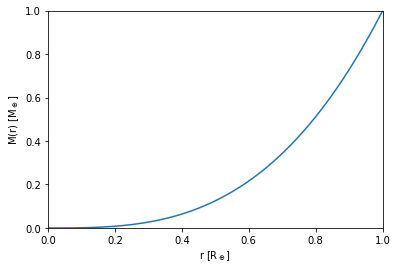

In [ ]:
fig,axs=plt.subplots()

ax=axs
ax.plot(rs_PREM/a,Mrs_hom/M)
ax.set_xlabel(r"r [R$_\oplus$]")
ax.set_ylabel(r"M(r) [M$_\oplus$]")
ax.margins(0)

Campo gravitacional:

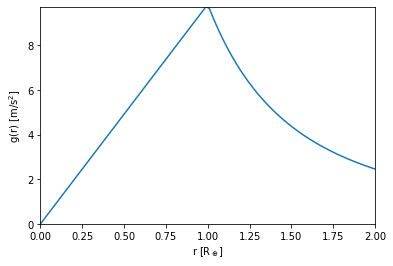

In [ ]:
G=6.67e-11
rs_hom=np.linspace(0,2*a,100)
grs_hom=np.zeros_like(rs_hom)
grs_hom[rs_hom<a]=(4*np.pi/3)*G*ρo*rs_hom[rs_hom<a]
grs_hom[rs_hom>a]=(4*np.pi/3)*G*ρo*(a**3/rs_hom[rs_hom>a]**2)

fig,axs=plt.subplots()
ax=axs
ax.plot(rs_hom/a,grs_hom)
ax.set_xlabel(r"r [R$_\oplus$]")
ax.set_ylabel(r"g(r) [m/s$^2$]")
ax.margins(0)

Potencial gravitacional:

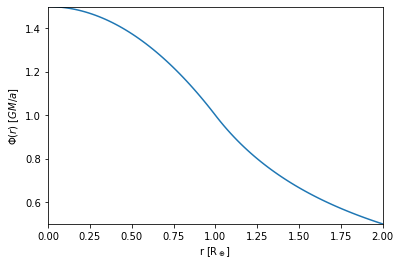

In [ ]:
Φo=G*M/a
Φs_hom=np.zeros_like(rs_hom)
Φs_hom[rs_hom<a]=-(2*np.pi/3)*G*ρo*(3*a**2-rs_hom[rs_hom<a]**2)
Φs_hom[rs_hom>a]=-(4*np.pi/3)*G*ρo*a**3/rs_hom[rs_hom>a]

fig,axs=plt.subplots()
ax=axs
ax.plot(rs_hom/a,-Φs_hom/Φo)
ax.set_xlabel(r"r [R$_\oplus$]")
ax.set_ylabel(r"$\Phi(r)$ [$GM/a$]")
ax.margins(0)

Usando la solución a la ecuación de equilibrio hidrostático:

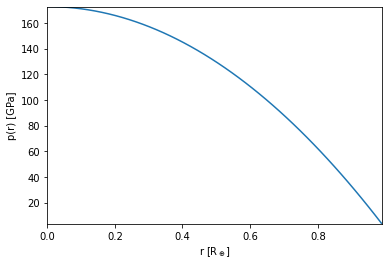

In [ ]:
po=0
Ho=-Φo
ps_hom=ρo*(Ho-Φs_hom[rs_hom<a])

fig,axs=plt.subplots()
ax=axs
ax.plot(rs_hom[rs_hom<a]/a,ps_hom/1e9)
ax.set_xlabel(r"r [R$_\oplus$]")
ax.set_ylabel(r"p(r) [GPa]")
ax.margins(0)

## La gravead de un planeta real

In [ ]:
from scipy.interpolate import interp1d
from scipy.integrate import quad as integral

Interpolamos el valor de la densidad:

In [ ]:
rs_PREM=np.array(prem.radius[::-1]*1e3) #Para que el último radio sea el primero
ρs_PREM=np.array(prem.density[::-1]*1e3)
rho_int=interp1d(rs_PREM,ρs_PREM)

Escribimos la función que va en la integral de la masa contenida:

In [ ]:
def mr(r):
  m=4*np.pi*r**2*rho_int(r)
  return m

Probamos la integral para verificar que la masa total si es la masa de la Tierra:

In [ ]:
M,dM=integral(mr,0,a)
print(f"Masa calculada: {M} ± {dM/M*100}%")

Masa calculada: 5.973088848074285e+24 ± 0.055975526105537056%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


Calculamos la masa contenida en cada r y de allí el campo gravitacional:

In [ ]:
Mrs_PREM=np.array([integral(mr,0,r)[0] for r in rs_PREM])
gs_PREM=G*Mrs_PREM[1:]/rs_PREM[1:]**2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


Para el potencial tenemos que escribir la función de la integral que complementa el término principal del potencial⁉

$$
\Phi(r)=-G \frac{M(r)}{r}-4 \pi G \int_{r}^{\infty} s \rho(s) d s
$$

In [ ]:
#ps_hom=ρo*(Ho-Φs_hom[rs_hom<a])
def dΦs(r):
  f=r*rho_int(r)
  return f

Debemos calcular el término remanente por cada r dentro del planeta:

In [ ]:
ΔΦs_PREM=-4*np.pi*G*np.array([integral(dΦs,r,a)[0] for r in rs_PREM])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


In [ ]:
Φs_PREM=-G*Mrs_PREM[1:]/rs_PREM[1:]+ΔΦs_PREM[1:]

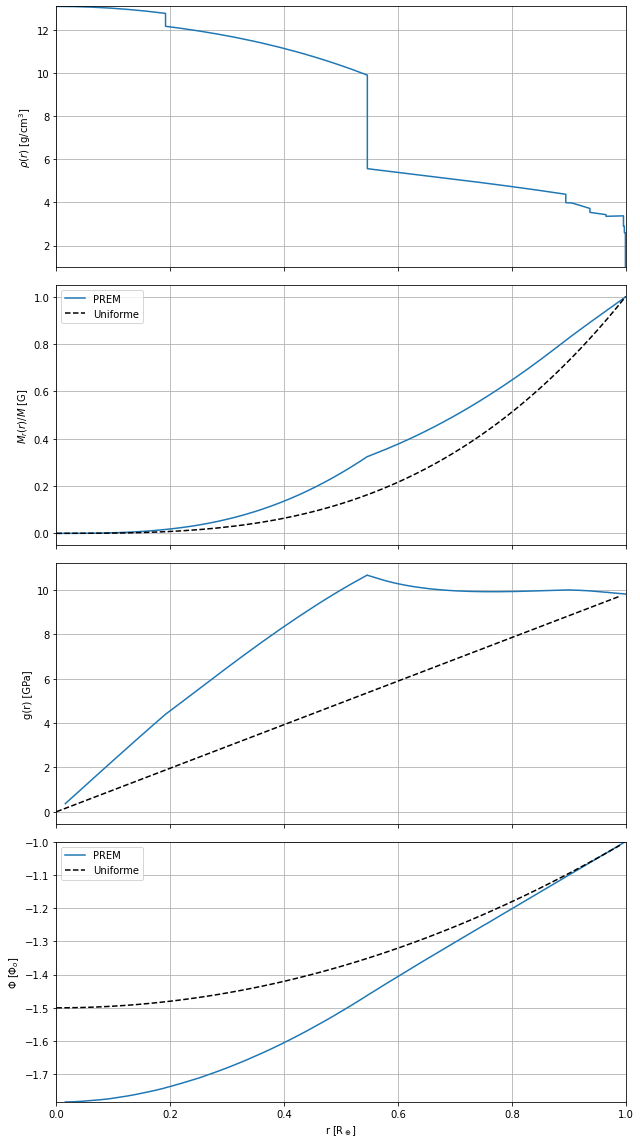

In [ ]:
fig,axs=plt.subplots(4,1,figsize=(9,16),sharex=True)
ax=axs[0]
ax.plot(rs_PREM/a,ρs_PREM/1e3)
ax.set_ylabel(r"$\rho(r)$ [g/cm$^3$]")
ax.grid()
ax.margins(0)
ax=axs[1]
ax.plot(rs_PREM/a,Mrs_PREM/M,label="PREM")
ax.plot(rs_PREM/a,Mrs_hom/M,'k--',label="Uniforme")
ax.set_ylabel(r"$M_r(r)/M$ [G]")
ax.legend()
ax.grid()
ax=axs[2]
ax.plot(rs_PREM[1:]/a,gs_PREM,label="PREM")
ax.plot(rs_hom[rs_hom<a]/a,grs_hom[rs_hom<a],'k--',label="Uniforme")
ax.set_ylabel(r"g(r) [GPa]")
ax.grid()
ax=axs[3]
ax.plot(rs_PREM[1:]/a,Φs_PREM/Φo,label="PREM")
ax.plot(rs_hom[rs_hom<a]/a,Φs_hom[rs_hom<a]/Φo,'k--',label="Uniforme")
ax.set_ylabel(r"Φ [Φ$_o$]")
ax.grid()
ax.margins(0)
ax.set_xlabel(r"r [R$_\oplus$]")
ax.legend()
fig.tight_layout()

## Equilibrio hidrostático

Ecuaciones de equilibrio hidrostático:

$$
\frac{\mathrm d p}{\mathrm d r} = -\frac{GM_r\rho}{r^2}
$$

$$
\frac{\mathrm d M_r}{\mathrm d r} = 4\pi r^2\rho
$$

Las ecuaciones escritas para ser resueltas numéricamente serían:

In [ ]:
def edo_hidrostatico(Y,r):
  p,Mr=Y
  dpdr=-G*Mr*rho_int(r)/r**2
  dMrdr=4*np.pi*r**2*rho_int(r)
  return [dpdr,dMrdr]

In [ ]:
from scipy.integrate import odeint

Las condiciones iniciales no se conocen en el centro, por lo que la integrción de estas ecuaciones debe hacerse de la superficie al centro.  Aquí es muy importante cuidar que la variable radial nunca sea cero y que la masa no alcance valores negativos.

In [ ]:
#Condiciones iniciales
Yo=[0,M*1.001]
rs=rs_PREM[-1:0:-1]
solucion=odeint(edo_hidrostatico,Yo,rs)
ps_EH=solucion[::-1,0]
Mrs_EH=solucion[::-1,1]

Una comparación con lo obtenido en el modelo homogéneo:

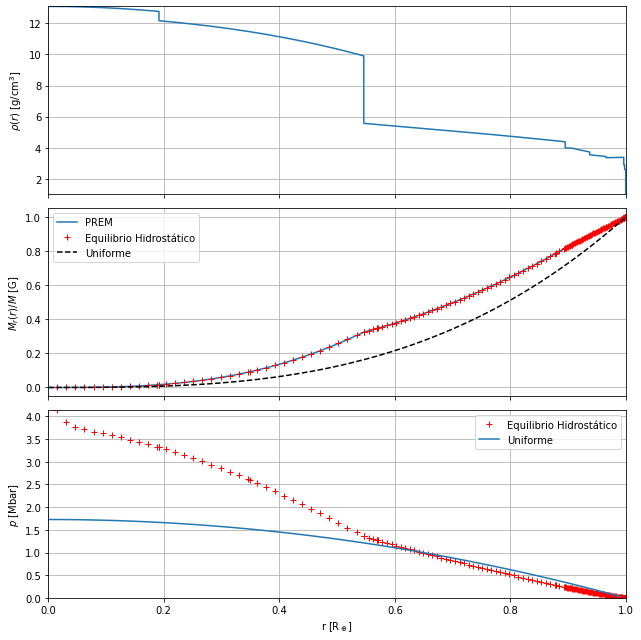

In [ ]:
fig,axs=plt.subplots(3,1,figsize=(9,9),sharex=True)
ax=axs[0]
ax.plot(rs_PREM/a,ρs_PREM/1e3)
ax.set_ylabel(r"$\rho(r)$ [g/cm$^3$]")
ax.grid()
ax.margins(0)

ax=axs[1]
ax.plot(rs_PREM/a,Mrs_PREM/M,label="PREM")
ax.plot(rs_PREM[1:]/a,Mrs_EH/M,'r+',label="Equilibrio Hidrostático")
ax.plot(rs_PREM/a,Mrs_hom/M,'k--',label="Uniforme")
ax.set_ylabel(r"$M_r(r)/M$ [G]")
ax.legend()
ax.grid()

ax=axs[2]
ax.plot(rs_PREM[1:]/a,ps_EH/1e11,'r+',label="Equilibrio Hidrostático")
ax.plot(rs_hom[rs_hom<a]/a,ps_hom/1e11,label="Uniforme")
ax.set_ylabel(r"$p$ [Mbar]")
ax.legend()
ax.grid()

ax.margins(0)
ax.set_xlabel(r"r [R$_\oplus$]")
ax.legend()
fig.tight_layout()

Deducción de la ecuación de la densidad:

$$
\frac{\mathrm d p}{\mathrm d r} = -\frac{GM_r\rho}{r^2}
$$

$$
\frac{\mathrm d p}{\mathrm d \rho} = \frac{K}{\rho}
$$

Dividiendo la primera por la segunda⁉

$$
\frac{\mathrm d \rho}{\mathrm d r} = -\frac{GM_r\rho^2}{K r^2}
$$

Las ecuaciones más completas son:

\begin{eqnarray}
\frac{\mathrm d \rho}{\mathrm d r} & = & -\frac{\rho^2g}{K(\rho,p)} \\
\frac{\mathrm d g}{\mathrm d r} & = & 4\pi G\rho - \frac{2GM_r}{r^3} \\
\frac{\mathrm d M_r}{\mathrm d r} & = & 4\pi r^2\rho \\ 
\frac{\mathrm d p}{\mathrm d r} & = & -\frac{GM_r\rho}{r^2}
\end{eqnarray}

Primero necesitamos la función que nos da el K:

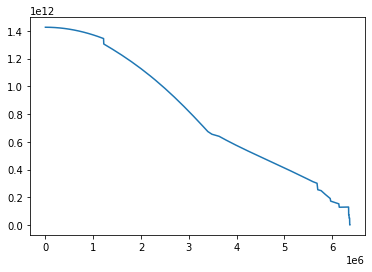

In [ ]:
#Interpolacion
Ks_PREM=np.array(prem.density*(prem.Vph**2-4*prem.Vsh**2/3)*1e9)
Kfun=interp1d(list(rs_PREM)+[2*a],list(Ks_PREM[::-1])+[Ks_PREM[-1]])

fig,ax=plt.subplots()
ax.plot(rs_PREM,Kfun(rs_PREM))

Las ecuaciones se implementan con:

In [ ]:
def edo_hidrostatico_Kg(Y,r):
  rho,g,Mr,p=Y
  drhodr=-rho**2*g/Kfun(r)
  dgdr=4*np.pi*G*rho-2*G*Mr/r**3
  dMrdr=4*np.pi*r**2*rho
  dpdr=-rho*g
  return [drhodr,dgdr,dMrdr,dpdr]

In [ ]:
#Condiciones iniciales
rc=rs_PREM[1]
ρc=6.8e3 #kg/m^3
Mrc=4/3*np.pi*rc**3*ρc
gc=G*Mrc/rc**2
pc=2.05e11
Yo=[ρc,gc,Mrc,pc]
rs=rs_PREM[1:]
solucion=odeint(edo_hidrostatico_Kg,Yo,rs)
ρs_EHKg=solucion[:,0]
gs_EHKg=solucion[:,1]
Mrs_EHKg=solucion[:,2]
ps_EHKg=solucion[:,3]
rs[-1]/a,Mrs_EHKg[-1]/M,ps_EHKg[-1]/1e9

(1.0, 0.9981971604897768, 0.22782750850237354)

Graficando:

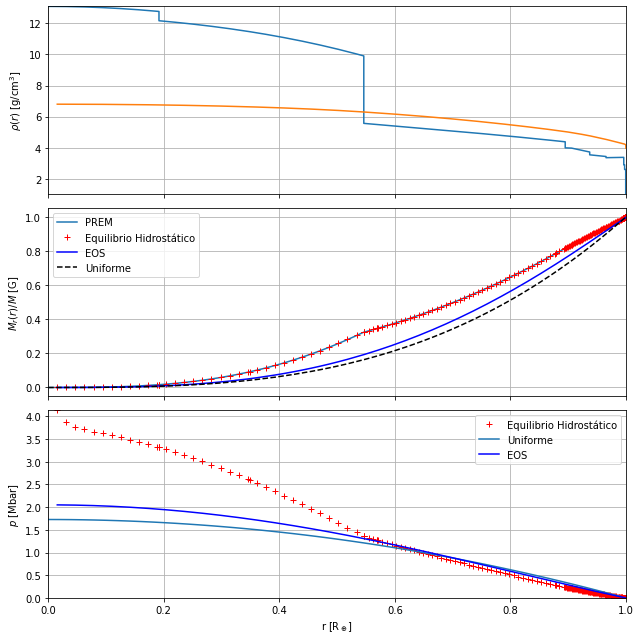

In [ ]:
fig,axs=plt.subplots(3,1,figsize=(9,9),sharex=True)
ax=axs[0]
ax.plot(rs_PREM/a,ρs_PREM/1e3)
ax.plot(rs/a,ρs_EHKg/1e3)
ax.set_ylabel(r"$\rho(r)$ [g/cm$^3$]")
ax.grid()
ax.margins(0)
ax=axs[1]
ax.plot(rs_PREM/a,Mrs_PREM/M,label="PREM")
ax.plot(rs_PREM[1:]/a,Mrs_EH/M,'r+',label="Equilibrio Hidrostático")
ax.plot(rs/a,Mrs_EHKg/M,'b-',label="EOS")
ax.plot(rs_PREM/a,Mrs_hom/M,'k--',label="Uniforme")
ax.set_ylabel(r"$M_r(r)/M$ [G]")
ax.legend()
ax.grid()
ax=axs[2]
ax.plot(rs_PREM[1:]/a,ps_EH/1e11,'r+',label="Equilibrio Hidrostático")
ax.plot(rs_hom[rs_hom<a]/a,ps_hom/1e11,label="Uniforme")
ax.plot(rs/a,ps_EHKg/1e11,'b-',label="EOS")
ax.set_ylabel(r"$p$ [Mbar]")
ax.legend()
ax.grid()

ax.margins(0)
ax.set_xlabel(r"r [R$_\oplus$]")
ax.legend()
fig.tight_layout()

Deducción de la ecuación de equilibrio hidrostático para EOS barotrópica:


$$
-\frac{r^2}{\rho}\frac{\mathrm d p}{\mathrm d r} = -GM_r
$$

$$
\frac{\mathrm d}{\mathrm d r}\left(-\frac{r^2}{\rho}\frac{\mathrm d p}{\mathrm d r}\right) = -G\frac{\mathrm d M_r}{\mathrm d r}
$$

$$
\frac{1}{r^2}\frac{\mathrm d}{\mathrm d r}\left(-\frac{r^2}{\rho}\frac{\mathrm d p}{\mathrm d r}\right) = -4\pi G \rho(p)
$$